In [1]:
# for displaying image in google colab
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# function to plot histograms
def plot_histograms(image):
  color = ('b','g','r')
  for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
  plt.xlabel("pixel intensity values")
  plt.ylabel("Number of pixels")
  plt.show()

In [3]:
# function to perform rotation
def roatation(image,rows,cols):
  # set the angle to 30 degree for rotation
  angle = np.radians(30) 
  # transformation matrix for rotation
  rotate = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])

  print("\n***********Rotation matrix***************")
  print(rotate)
  # apply a perspective transformation to the image
  rotated_img = cv2.warpPerspective(image, rotate, (cols,rows))
  print("\n***********Rotation image****************")
  cv2_imshow(rotated_img)
  # write the image
  cv2.imwrite('roatated.jpeg',rotated_img)

  return rotate,rotated_img

# function to perform scaling
def scaling(image,rows,cols):
  # transformation matrix for Scaling
  scale = np.float32([[1.65, 0  , 0],
            	[0, 1.75, 0],
            	[0,   0,   1]])
  
  print("\n***********Scaling matrix***************")
  print(scale)
  # apply a perspective transformation to the image
  scaled_img = cv2.warpPerspective(image,scale,(cols*2,rows*2))
  print("\n***********Scaling image****************")
  cv2_imshow(scaled_img)
  # write the image
  cv2.imwrite('scaled.jpeg',scaled_img)

  return scale,scaled_img

# function to perform translation
def translation(image,rows,cols):
  # transformation matrix for translation
  translate = np.float32([[1, 0, 40],
                [0, 1, 40],
                [0, 0, 1]])
  
  print("\n***********Translation matrix***************")
  print(translate)
  # apply a perspective transformation to the image
  translated_img = cv2.warpPerspective(image, translate, (cols, rows))
  print("\n***********Translation image****************")
  cv2_imshow(translated_img)
  # write the image
  cv2.imwrite('translated.jpeg',translated_img)

  return translate,translated_img

# function to perform composition of transformations
def comp(image,translate,rotate,scale,value,rows,cols):
  # composite transformation
  composite = translate@rotate@scale
  # creates image with the order of the composition
  # here sequence of transfromation R stands for rotation, S stands for scaling and T stands for translation
  print("\n***********Composition matrix for sequence of transformation as {}***************".format(value))
  print(composite)
  # apply a composite transformation to the image
  composite_img = cv2.warpPerspective(image, composite, (cols, rows))
  # here sequence of transfromation R stands for rotation, S stands for scaling and T stands for translation
  print("\n***********Composition image for sequence of transformation as {}****************".format(value))
  cv2_imshow(composite_img)
  # write the image here it adds information T-S-R or R-S-T depending on the order of transformation 
  # where R stands for Rotation, S for Scaling and T for Translation
  cv2.imwrite('composite{}.jpeg'.format(value),composite_img)

  return composite,composite_img

In [4]:
def transformations(image):
  rows,cols,dim = image.shape

  # First transaltion transformation
  translate,translated_img = translation(image,rows,cols)
 
  # Second rotation transformation
  rotate,rotated_img = roatation(image,rows,cols)
  
  # Third scaling transformation
  scale,scaled_img = scaling(image,rows,cols)

  # composite transformation
  composite,composite_img = comp(image,translate,rotate,scale,"T-R-S",rows,cols)
  # changed order composite transformation
  composite1,composite_img1 = comp(image,rotate,scale,translate,"R-S-T",rows,cols)
  # changed order composite transformation
  composite2,composite_img2 = comp(image,scale,translate,rotate,"S-T-R",rows,cols)

  #plot all the histograms
  plot_list = [image,translated_img,rotated_img,scaled_img,composite_img,composite_img1,composite_img2]
  plot_name = ["histogram of original image","histogram of translated image",
               "histogram of rotation image","histogram of scaling image",
               "histogram of composite image T-R-S","histogram of composite image R-S-T",
               "histogram of composite image S-T-R"]

  for i in range(0,len(plot_list)):
    print("\n*******************{}*******************".format(plot_name[i]))
    plot_histograms(plot_list[i])
  

  


***********Translation matrix***************
[[ 1.  0. 40.]
 [ 0.  1. 40.]
 [ 0.  0.  1.]]

***********Translation image****************


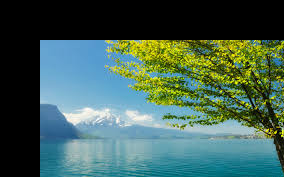


***********Rotation matrix***************
[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]

***********Rotation image****************


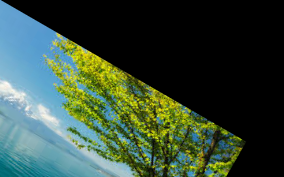


***********Scaling matrix***************
[[1.65 0.   0.  ]
 [0.   1.75 0.  ]
 [0.   0.   1.  ]]

***********Scaling image****************


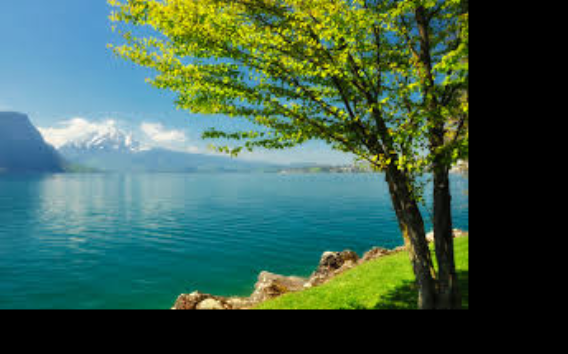


***********Composition matrix for sequence of transformation as T-R-S***************
[[ 1.4289418 -0.875     40.       ]
 [ 0.825      1.5155444 40.       ]
 [ 0.         0.         1.       ]]

***********Composition image for sequence of transformation as T-R-S****************


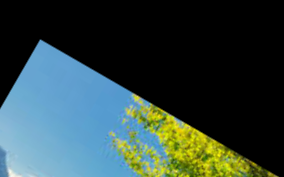


***********Composition matrix for sequence of transformation as R-S-T***************
[[ 1.4289418 -0.875     22.157673 ]
 [ 0.825      1.5155444 93.62178  ]
 [ 0.         0.         1.       ]]

***********Composition image for sequence of transformation as R-S-T****************


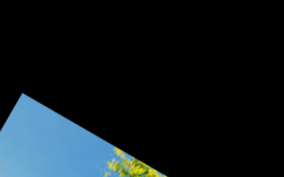


***********Composition matrix for sequence of transformation as S-T-R***************
[[ 1.4289418 -0.825     66.       ]
 [ 0.875      1.5155444 70.       ]
 [ 0.         0.         1.       ]]

***********Composition image for sequence of transformation as S-T-R****************


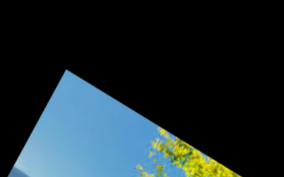


*******************histogram of original image*******************


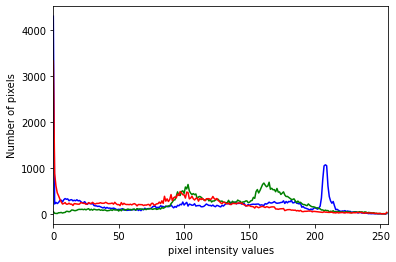


*******************histogram of translated image*******************


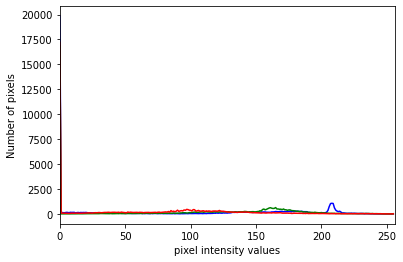


*******************histogram of rotation image*******************


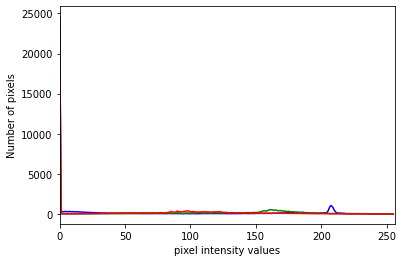


*******************histogram of scaling image*******************


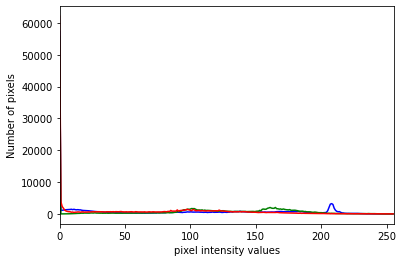


*******************histogram of composite image T-R-S*******************


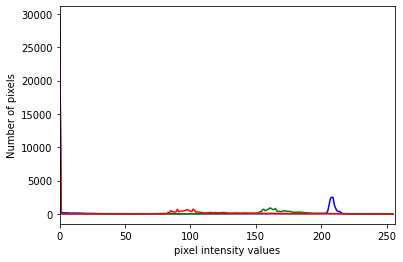


*******************histogram of composite image R-S-T*******************


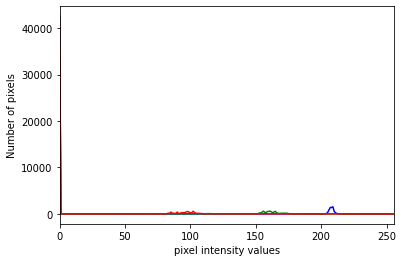


*******************histogram of composite image S-T-R*******************


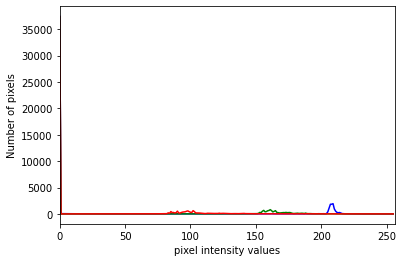

In [5]:
def main():
  # read image provide path of the input image
  image = cv2.imread('/content/drive/MyDrive/cvexam/images.jpeg') 
  # get the shape of the input image
  rows,cols,dim=image.shape
  # call the transformation functions
  transformations(image)

if __name__:main()